C:\Users\HP\AppData\Local\Temp\ipykernel_20508\3540841374.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


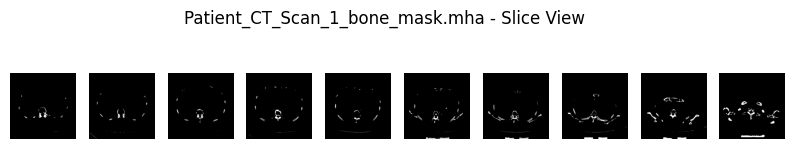

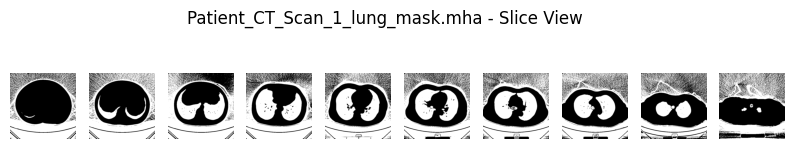

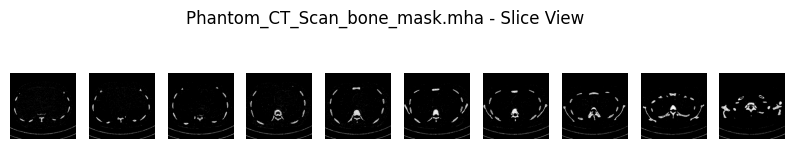

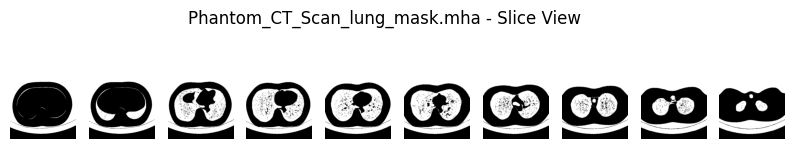

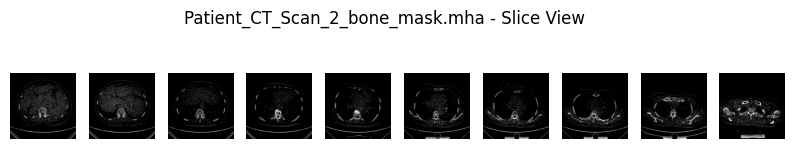

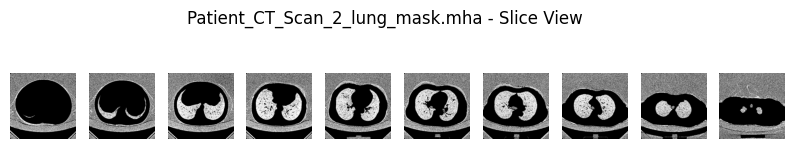

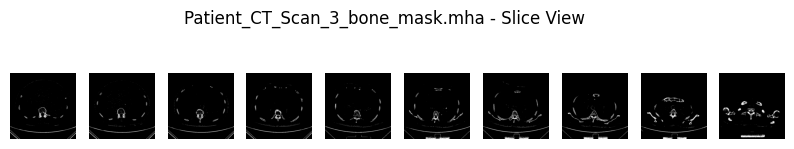

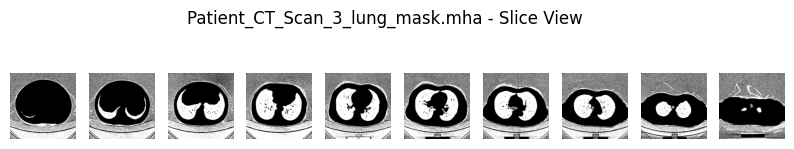

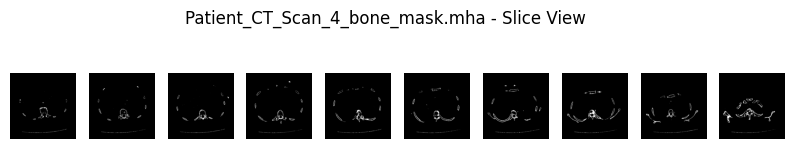

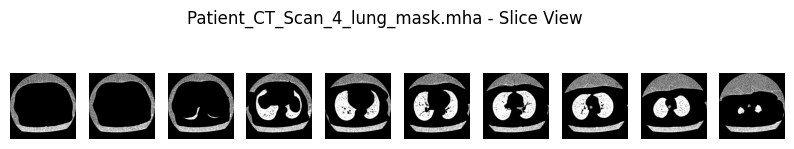

In [1]:
import os
import SimpleITK as sitk
import ipyvolume as ipv
import numpy as np
from ipywidgets import IntSlider, interact
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import ipywidgets as widgets

# Directory where the data is located
data_dir = 'Results'

# Get the list of folder names
folders = os.listdir(data_dir)

def display_images(image, title, montage_slices=10):
    # Convert the SimpleITK image to a numpy array
    image_array = sitk.GetArrayFromImage(image)
    
    # Normalize to 0-255
    image_array = ((image_array - image_array.min()) * (1/(image_array.max() - image_array.min()) * 255)).astype('uint8')
    
    # 3D visualization using ipyvolume
    ipv.figure()
    ipv.volshow(image_array, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=255)
    fig3d = ipv.gcc()
    
    # Create a layout with a title
    title_widget = widgets.HTML(f'<h2>{title} - 3D View</h2>')
    layout = widgets.VBox([title_widget, fig3d])
    display(layout)

    # Montage of slices using matplotlib
    fig = plt.figure(figsize=(10, 2))
    fig.suptitle(title + " - Slice View")
    slice_interval = image_array.shape[0] // montage_slices
    for i in range(montage_slices):
        ax = fig.add_subplot(1, montage_slices, i + 1)
        ax.imshow(image_array[i * slice_interval], cmap='gray')
        plt.axis('off')
    plt.show()

# For each folder
for folder in folders:
    # Full path to the folder
    full_path = os.path.join(data_dir, folder)

    # Get the list of files in the folder
    files = os.listdir(full_path)

    # For each file
    for file in files:
        # Full path to the file
        file_path = os.path.join(full_path, file)

        # Read and display the .mha file
        if file.endswith('.mha'):
            # Read the .mha image file
            image = sitk.ReadImage(file_path)
            display_images(image, file)

        # Read and display the .tfm file
        elif file.endswith('.tfm'):
            # Read the .tfm transformation file
            transform = sitk.ReadTransform(file_path)
            display(HTML(f'<h2>{file}</h2>'))
            print(transform)
